In [1]:
!pip install xgboost


import numpy as np                                    # numerical operations
import pandas as pd                                   # data handling & dataframe operations
import matplotlib.pyplot as plt                       # plotting/graphs
import seaborn as sns                                 # visualizations (statistical plots)
from sklearn.preprocessing import LabelEncoder         # encoding categorical values
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Corrected module name
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [2]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()   # prints columns, data types, and missing values info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df=df.drop(columns=["customerID"])   #Removes unique identifier that doesn’t help prediction.

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
numerical_features_list = ["TotalCharges", "MonthlyCharges", "tenure"] 

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-" * 50)

"""
we undertsnd the df , so that we can normalizd it later

Declares numeric columns; for the rest (categoricals), prints unique levels to understand values & potential cleaning needs.

"""

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
df[df["TotalCharges"]==" "]  #TotalCharges sometimes has blank strings instead of numbers; this locates those rows.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [52]:
len(df[df["TotalCharges"]==" "])  #How many rows have blank TotalCharges.

11

In [54]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"});  #Converts the weird blank entry to a numeric string so it can be cast cleanly later

In [56]:
df["TotalCharges"]=df["TotalCharges"].astype(float)   #Turns TotalCharges into numeric dtype.

In [58]:
print(df["Churn"].value_counts())    #Shows class imbalance (typically many “No” vs fewer “Yes”).

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [60]:
df.describe()  #to read data distribution

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [1]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)  # Corrected module & boolean case
    plt.title(f"Distribution of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    plt.axvline(col_mean, color="red", linestyle="-", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")  # Fixed label argument
    plt.legend()
    plt.show()


"""
0 pe kitne log hai, 70 pe kitne, wat is mean n median
more people in left n right,  some stays
0 pe mtlb frquently changing sim, 70 pe loyal customer
"""

'\n0 pe kitne log hai, 70 pe kitne, wat is mean n median\n'

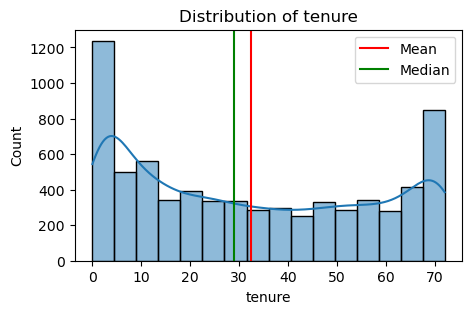

In [64]:
plot_histogram(df,"tenure")
"""
time people stay
"""

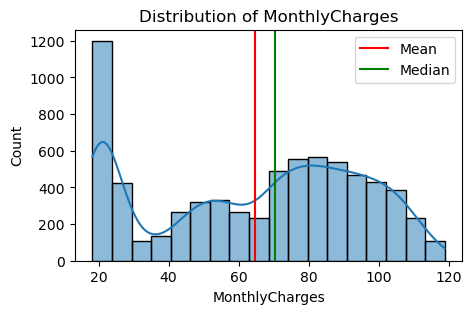

In [65]:
plot_histogram(df,"MonthlyCharges")

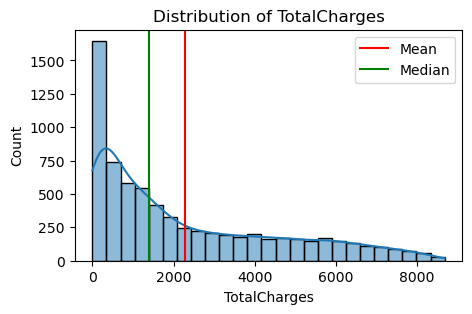

In [68]:
plot_histogram(df,"TotalCharges")

In [70]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])  # Corrected parameter
    plt.title(f"Boxplot of {column_name}")  # More appropriate title
    plt.ylabel(column_name)
    plt.show()


"""
boxplot to find outliers, outside box means outliers
niche minm, middle median, upar max, outside max/min is outlier


"""

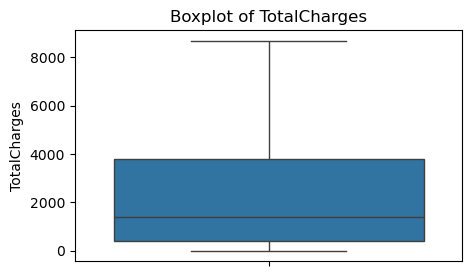

In [72]:
plot_boxplot(df,"TotalCharges")

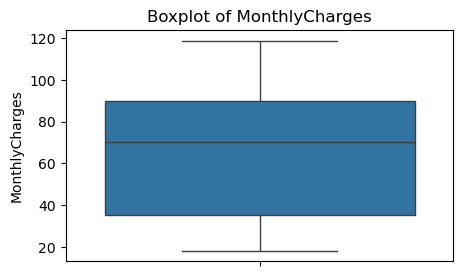

In [74]:
plot_boxplot(df,"MonthlyCharges")

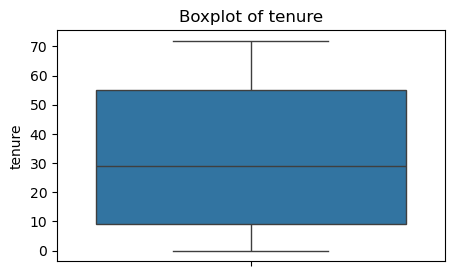

In [76]:
plot_boxplot(df,"tenure")

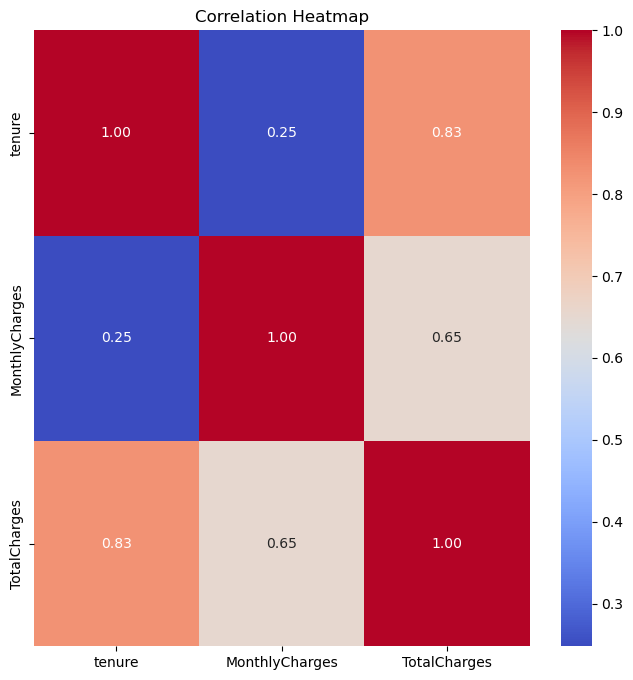

In [78]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Fixed True
plt.title("Correlation Heatmap")  # Fixed spelling
plt.show()                        #Shows linear correlations among the three numeric predictors.

"""
correlation between variables
price increase, people leave
1 high relation, 0 mtlb low realtion
"""

In [80]:
object_cols=df.select_dtypes(include="object").columns.to_list()   #Automatically collects columns with dtype object (categorical strings).

In [82]:
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [84]:
object_cols=["SerniorCitizen"]+object_cols

In [86]:
object_cols

['SerniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

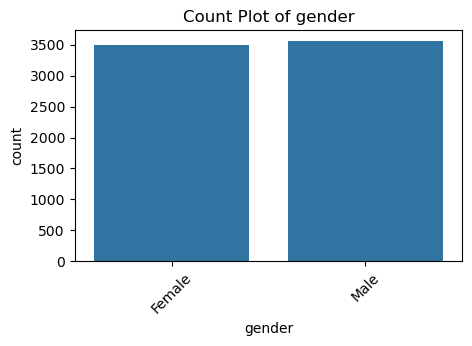

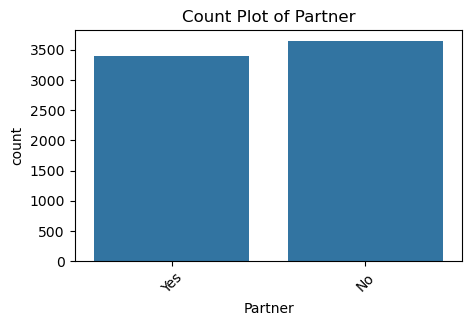

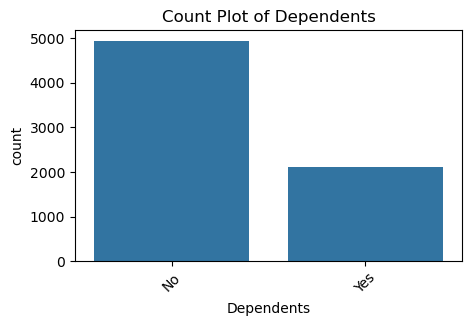

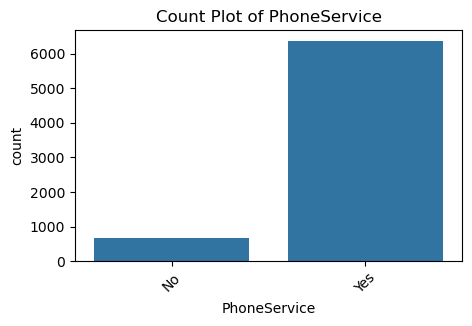

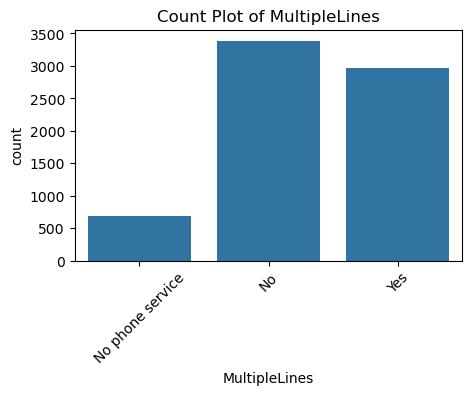

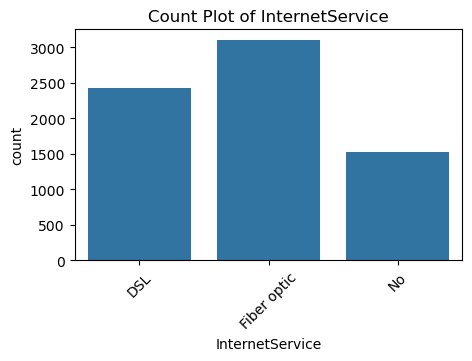

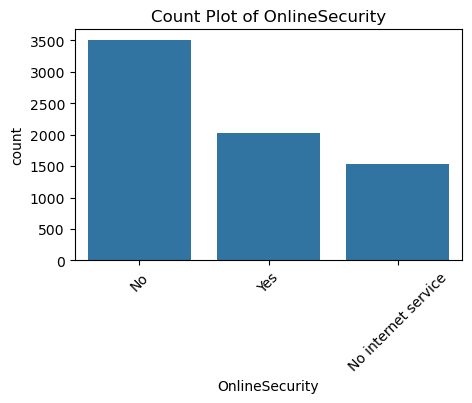

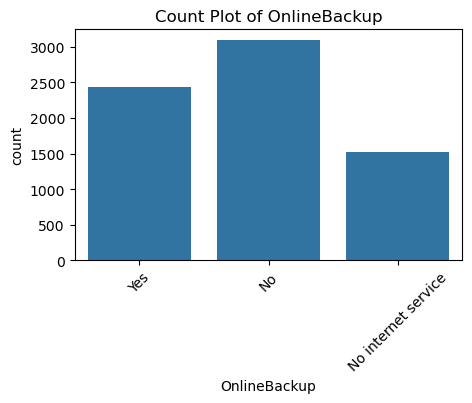

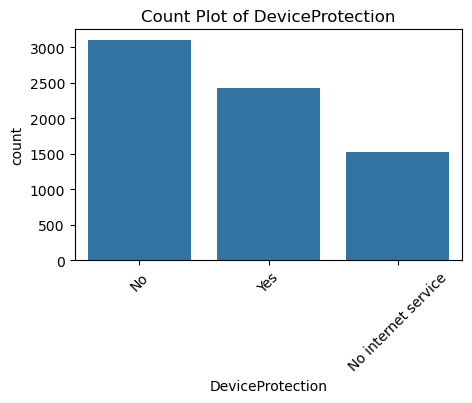

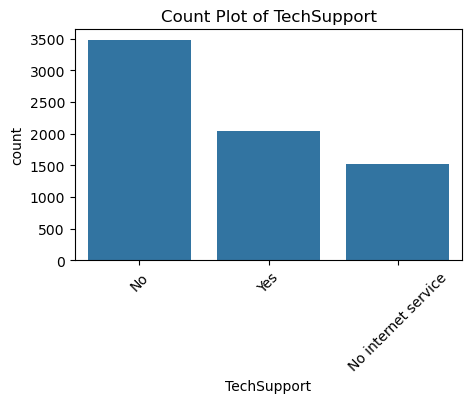

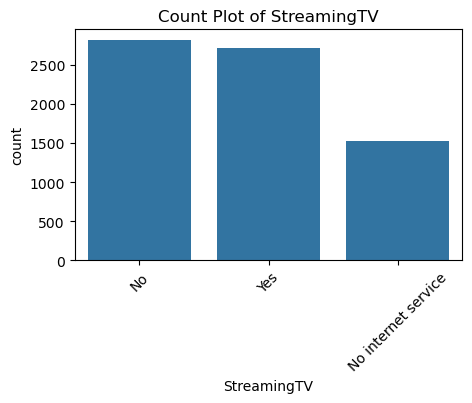

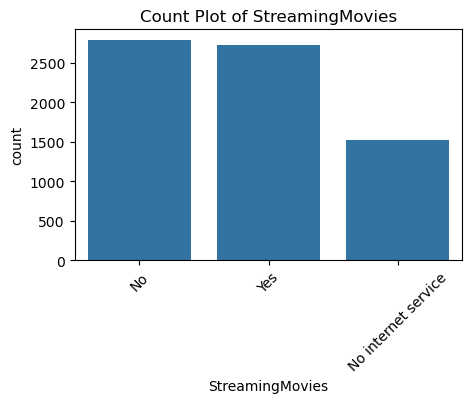

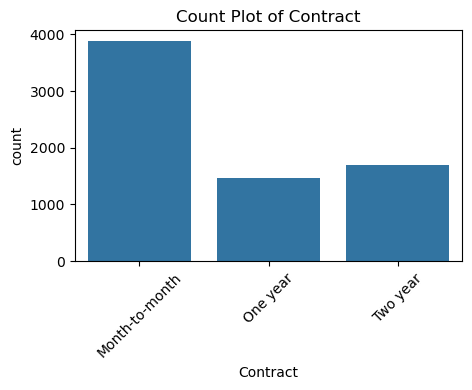

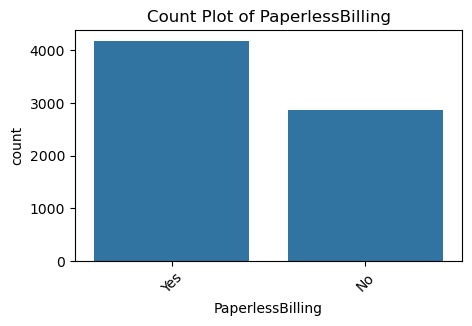

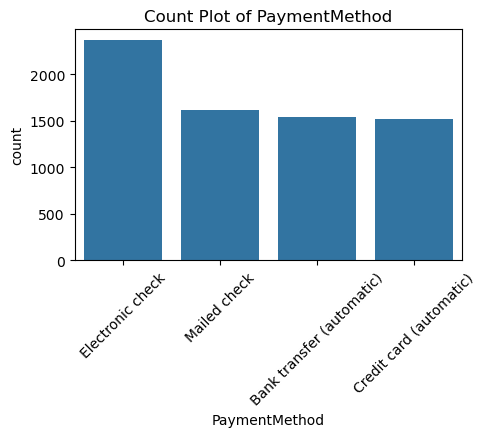

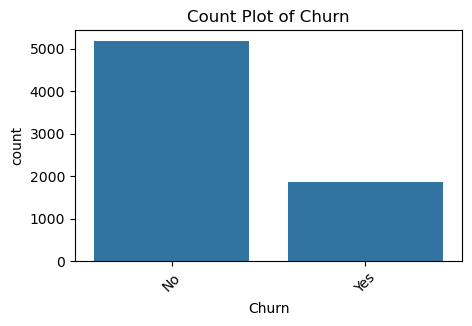

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns (Ensure correct spellings)
object_cols = df.select_dtypes(include=['object']).columns.tolist()  

# Validate column names before plotting
valid_cols = [col for col in object_cols if col in df.columns]

for col in valid_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)  # Corrected x and data arguments
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()



In [89]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype(object)

In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})

C:\Users\twink\AppData\Local\Temp\ipykernel_30944\1732244708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})


In [95]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [96]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [98]:
object_cols=df.select_dtypes(include="object").columns.to_list()

In [99]:
object_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [103]:
encoders = {}  # Dictionary to store label encoders

for column in object_cols:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])  # Transform column         # map text → ints
    encoders[column] = label_encoder  # Store encoder for future use                 # keep encoder for inverse transforms/saving

# Save encoders using pickle
with open("encoders.pkl", "wb") as f:  # Open file as 'f'
    pickle.dump(encoders, f)  # Dump dictionary into file

"""
Model wont understand Yes, No
so encoding, 0 1 


on-hot encoding, 
"""

In [110]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [112]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [114]:
X=df.drop(columns=["Churn"])   # training , so we r dropping target   # features
Y=df["Churn"]       # target

In [116]:
print(X)
print(Y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#test size means 80% training 20% test         80/20 split with fixed seed for reproducibility.

In [120]:
print(Y_train)

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64


In [122]:
print(X_train)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2142       0              0        0           1      21             1   
1623       0              0        0           0      54             1   
6074       1              0        1           0       1             0   
1362       1              0        0           0       4             1   
6754       1              0        0           1       0             1   
...      ...            ...      ...         ...     ...           ...   
3772       1              0        1           0       1             1   
5191       0              0        1           1      23             1   
5226       1              0        1           1      12             1   
5390       1              1        0           0      12             1   
860        1              0        0           0      26             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2142              0                0     

In [124]:
print(X_test)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185        0              0        1           0       1             0   
2715       1              0        0           0      41             1   
3825       0              0        1           1      52             1   
1807       0              0        0           0       1             1   
132        1              0        0           0      67             1   
...      ...            ...      ...         ...     ...           ...   
6366       0              0        1           0      64             1   
315        1              0        1           1      51             1   
2439       1              0        1           1      17             1   
5002       0              0        1           1      69             0   
1161       1              0        0           1       1             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185               1                0     

In [126]:
print(Y_test)

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64


In [128]:
#SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE         SMOTE
smote=SMOTE(random_state=42)

In [130]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [131]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [134]:
#Model Training
models={
    "XGBoost": XGBClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [136]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = {}  # Dictionary to store cross-validation scores

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    
    # Corrected function name & scoring parameter
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring="accuracy")  

    cv_scores[model_name] = scores  # Store scores

    # Fixed unterminated f-string (Properly closed quotes)
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)


Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------


In [137]:
cv_scores[model_name] = scores
#  ach model in a loop (defined in the omitted part), average CV accuracy was computed and stored to cv_scores.

In [138]:
cv_scores


{'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453])}

In [139]:
#RandomFOrest Gives higher accuracy
rfc=RandomForestClassifier(random_state=42)

In [140]:
rfc.fit(X_train_smote,Y_train_smote)

RandomForestClassifier(random_state=42)

In [141]:
Y_test_pred=rfc.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_test_pred))
print("Classification Report:\n",classification_report(Y_test,Y_test_pred))

Accuracy Score: 0.7771469127040455
Confusion Matrix:
 [[880 156]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [142]:
from sklearn.model_selection import RandomizedSearchCV   # import tool for randomized hyperparameter search

# Parameter Grid (actually a parameter DISTRIBUTION for RandomizedSearchCV)
param_grid = {
    'n_estimators': [200, 300, 400, 500],   # number of trees in the forest
    'max_depth': [8, 10, 12, 15, None],     # maximum depth of each tree (None = expand until pure)
    'min_samples_split': [2, 5, 10],        # min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # min samples required at a leaf node
    'bootstrap': [True, False]              # whether bootstrap samples are used when building trees
}

rf = RandomForestClassifier(random_state=42)  # base RF model with reproducible randomness

rf_random = RandomizedSearchCV(
    estimator=rf,                   # the model to tune
    param_distributions=param_grid, # search over these discrete choices
    n_iter=20,                      # try 20 random combinations from the grid above
    scoring='accuracy',             # evaluate each combo using accuracy
    cv=5,                           # 5-fold cross-validation for evaluation stability
    verbose=2,                      # print progress messages while searching
    random_state=42,                # make the random search reproducible
    n_jobs=-1                       # use all CPU cores for speed
)

rf_random.fit(X_train_smote, Y_train_smote)   # run the search on the balanced training data

print("Best Parameters:", rf_random.best_params_)  # show the best hyperparameter combo found
best_rf = rf_random.best_estimator_               # retrieve the RF model refit with those best params

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 15, 'bootstrap': False}


In [143]:
y_pred_tuned = best_rf.predict(X_test)

print("Accuracy (Tuned RF):", accuracy_score(Y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(Y_test, y_pred_tuned))

Accuracy (Tuned RF): 0.7707594038325053
Confusion Matrix:
 [[854 182]
 [141 232]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.56      0.62      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.77      1409



In [144]:
y_prob = best_rf.predict_proba(X_test)[:,1]

"""
predict_proba() gives probability for each class (0 = no churn, 1 = churn).
Output shape is (n_samples, 2)
[ :, 1 ] selects probability of class 1 (churn) for each customer
"""
# Try threshold = 0.42 (tuned value usually works well)
threshold = 0.42
"""
Default threshold = 0.50
You are using 0.42 (lower threshold = detect more churners)
Meaning: If probability ≥ 0.42, predict churn instead of waiting for ≥0.50
"""


y_pred_thresh = (y_prob >= threshold).astype(int)

"""
If probability >= threshold → label = 1 (churn)
Else → label = 0 (not churn)
astype(int) converts boolean True/False to 1/0
"""

print("Accuracy (Threshold Adjusted):", accuracy_score(Y_test, y_pred_thresh))
print(classification_report(Y_test, y_pred_thresh))


"""
I used threshold tuning instead of the default 0.5 to improve churn recall.
Since churn datasets are imbalanced, raw accuracy can be misleading.
A threshold of 0.42 gave a better balance between recall and precision, helping detect more real churners, which is more important for business decision-making.
"""

Accuracy (Threshold Adjusted): 0.7650816181689141
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1036
           1       0.54      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



In [145]:
from sklearn.metrics import precision_recall_curve
prec, rec, thresh = precision_recall_curve(Y_test, y_prob)
best_idx = np.argmax(2 * prec * rec / (prec + rec + 1e-6))
"""
Formula used: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
np.argmax(...) finds the index where F1-score is maximum
+1e-6 avoids divide-by-zero error
"""

best_threshold = thresh[best_idx]       #Gets the actual threshold value that gave the highest F1-score

print("Best Threshold:", best_threshold)

y_pred_best = (y_prob >= best_threshold).astype(int)

"""
Convert probabilities → class labels
If prob ≥ best_threshold → predict churn (1)
"""

print("Accuracy (Best Threshold):", accuracy_score(Y_test, y_pred_best))
print(classification_report(Y_test, y_pred_best))

Best Threshold: 0.3417795742308107
Accuracy (Best Threshold): 0.7452093683463449
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1036
           1       0.51      0.78      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



In [146]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC Score:", roc_auc_score(Y_test, y_prob))

ROC-AUC Score: 0.8305583446334117


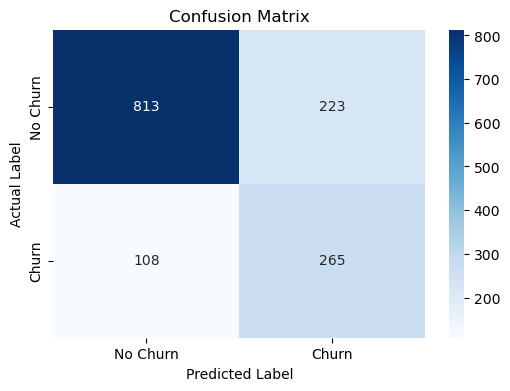

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1036
           1       0.54      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



In [170]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

threshold = 0.42
y_pred_final = (y_pred_proba >= threshold).astype(int)

cm = confusion_matrix(Y_test, y_pred_final)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn','Churn'],
            yticklabels=['No Churn','Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print(classification_report(Y_test, y_pred_final))

In [174]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as dictionary
report = classification_report(Y_test, y_pred_final, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Rename class labels from 0/1 to No Churn / Churn
df_report.rename(index={'0':'No Churn', '1':'Churn', 
                        'accuracy':'Accuracy', 
                        'macro avg':'Macro Avg', 
                        'weighted avg':'Weighted Avg'}, inplace=True)

# Round values for cleaner display
df_report = df_report.round(2)

# Display
df_report

,precision,recall,f1-score,support
No Churn,0.88,0.78,0.83,1036.00
Churn,0.54,0.71,0.62,373.00
Accuracy,0.77,0.77,0.77,0.77
Macro Avg,0.71,0.75,0.72,1409.00
Weighted Avg,0.79,0.77,0.77,1409.00


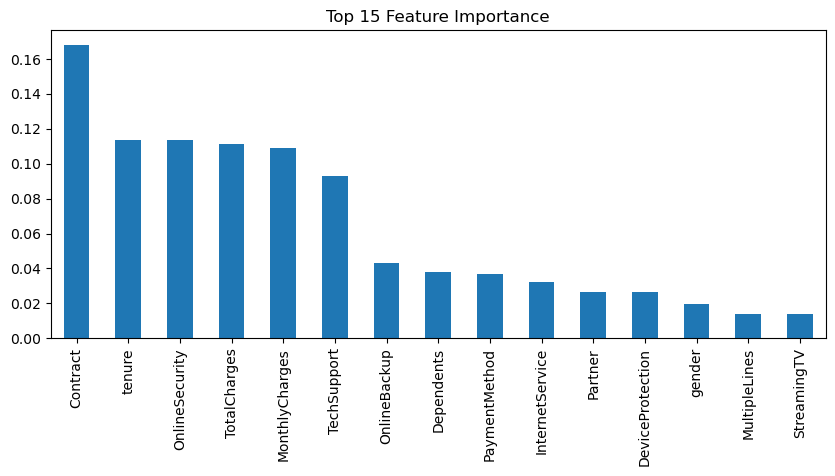

In [147]:
importances = pd.Series(best_rf.feature_importances_, index=X_train_smote.columns)
importances.nlargest(15).plot(kind='bar', figsize=(10,4))
plt.title("Top 15 Feature Importance")
plt.show()

In [148]:
import pickle

model_data = {
    "model": rfc,  # Ensure rfc is a trained model before saving
    "feature_names": X.columns.tolist()  # Fixed key name for clarity
}

# Save the model dictionary
with open("Customer_Churn_Model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved successfully!")


Model saved successfully!
